      Unnamed: 0_x  Соотношение матрица-наполнитель  Плотность, кг/м3  \
0                0                         1.857143       2030.000000   
1                1                         1.857143       2030.000000   
2                2                         1.857143       2030.000000   
3                3                         1.857143       2030.000000   
4                4                         2.771331       2030.000000   
...            ...                              ...               ...   
1018          1018                         2.271346       1952.087902   
1019          1019                         3.444022       2050.089171   
1020          1020                         3.280604       1972.372865   
1021          1021                         3.705351       2066.799773   
1022          1022                         3.808020       1890.413468   

      модуль упругости, ГПа  Количество отвердителя, м.%  \
0                738.736842                    30.000000   
1  

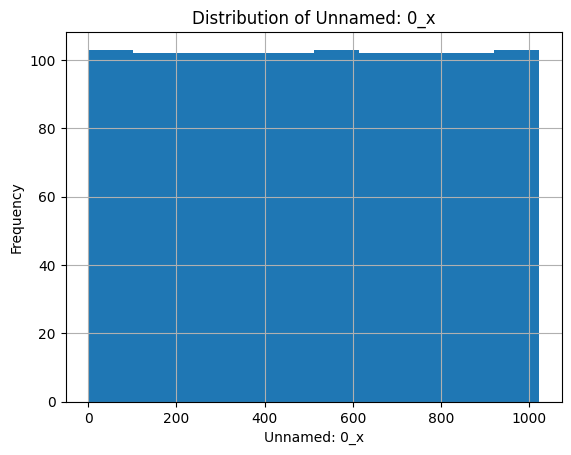

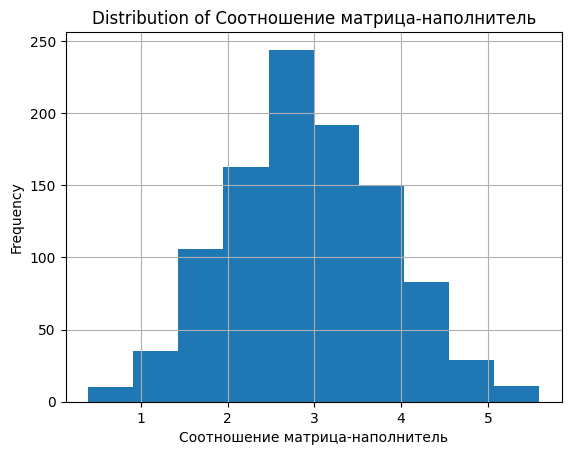

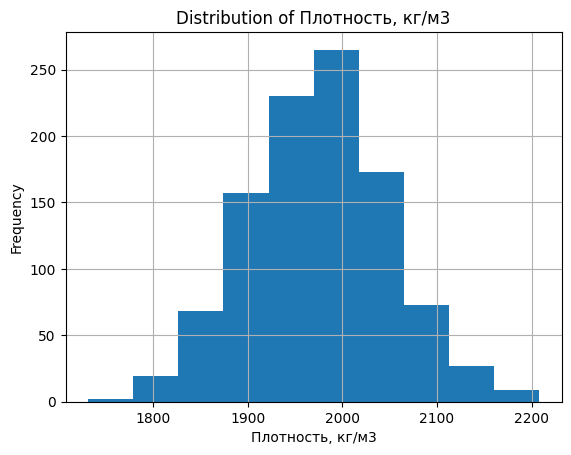

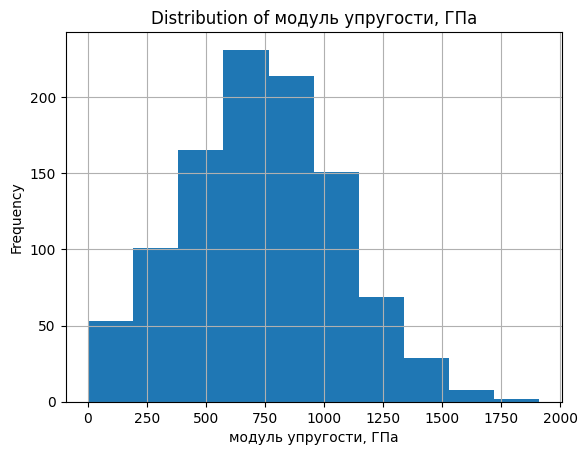

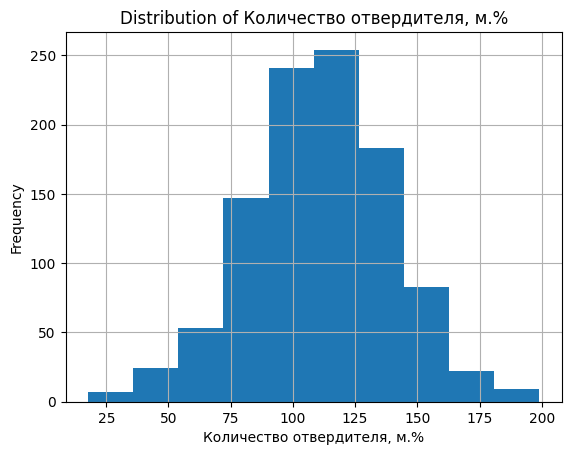

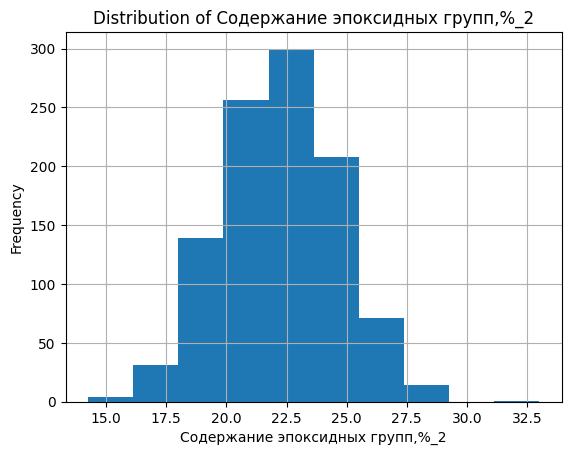

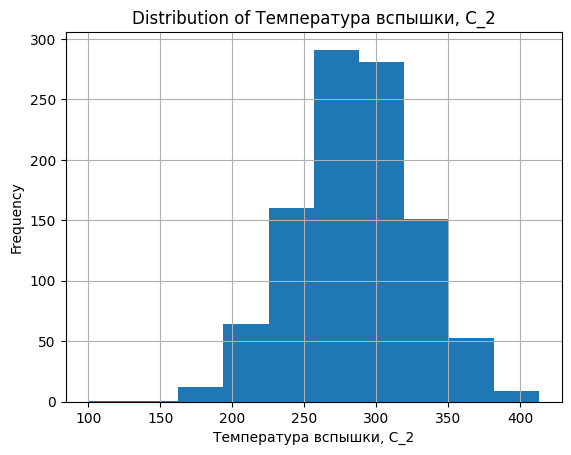

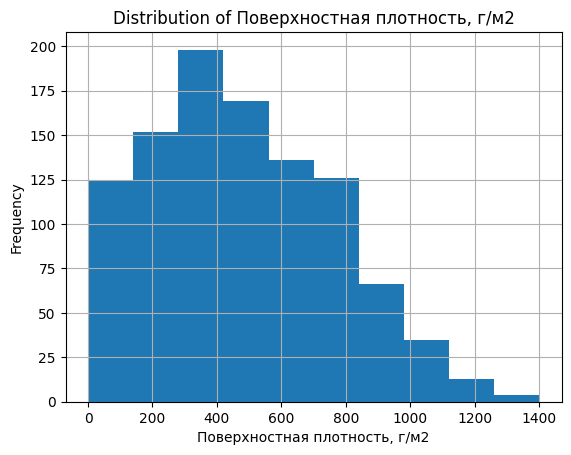

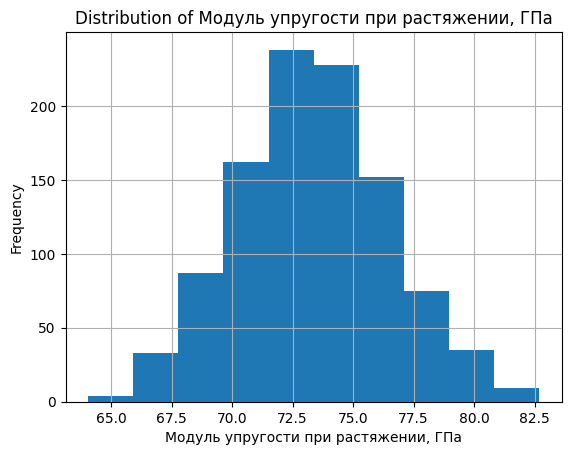

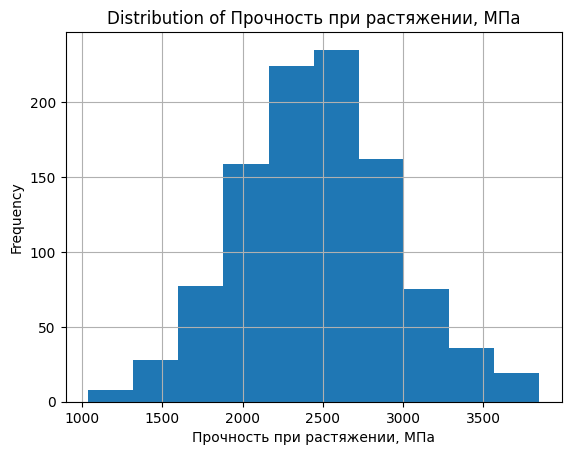

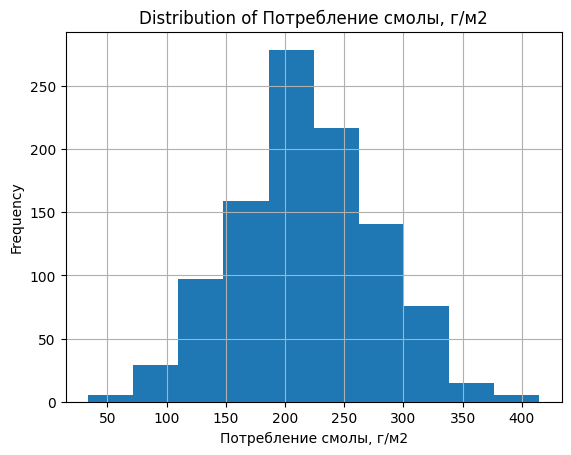

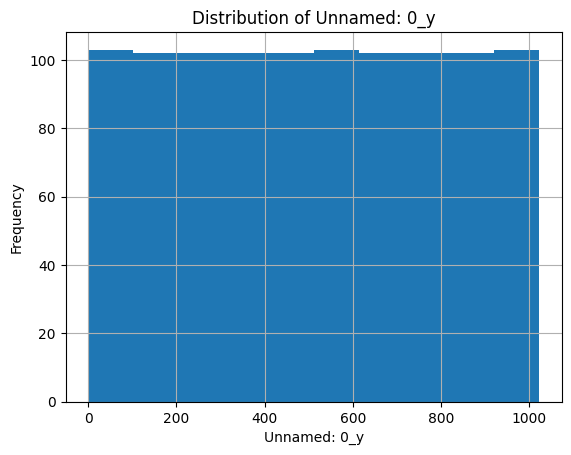

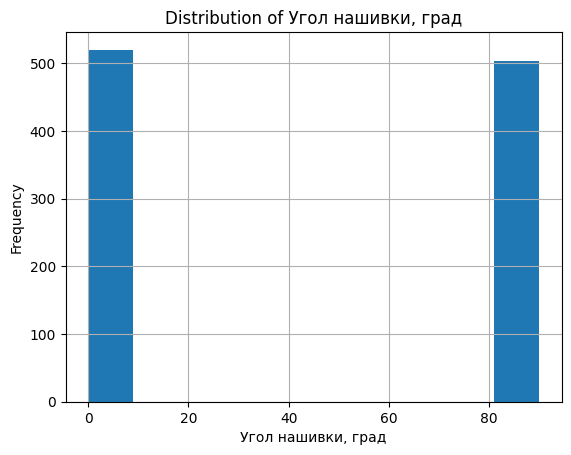

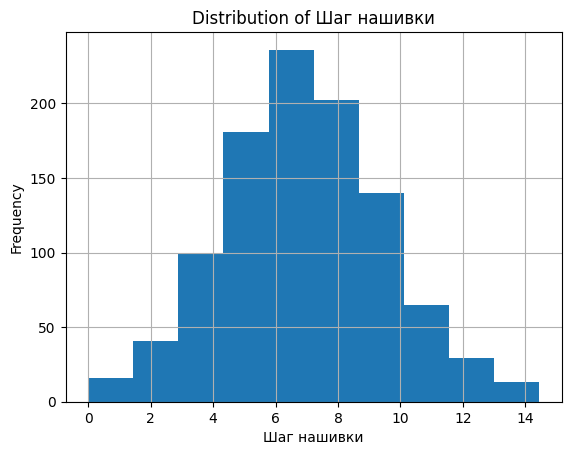

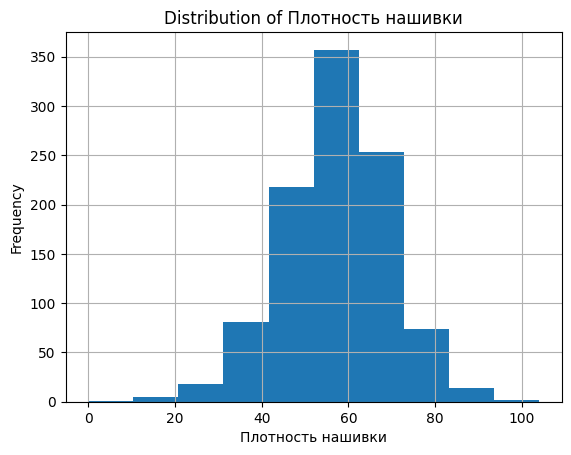

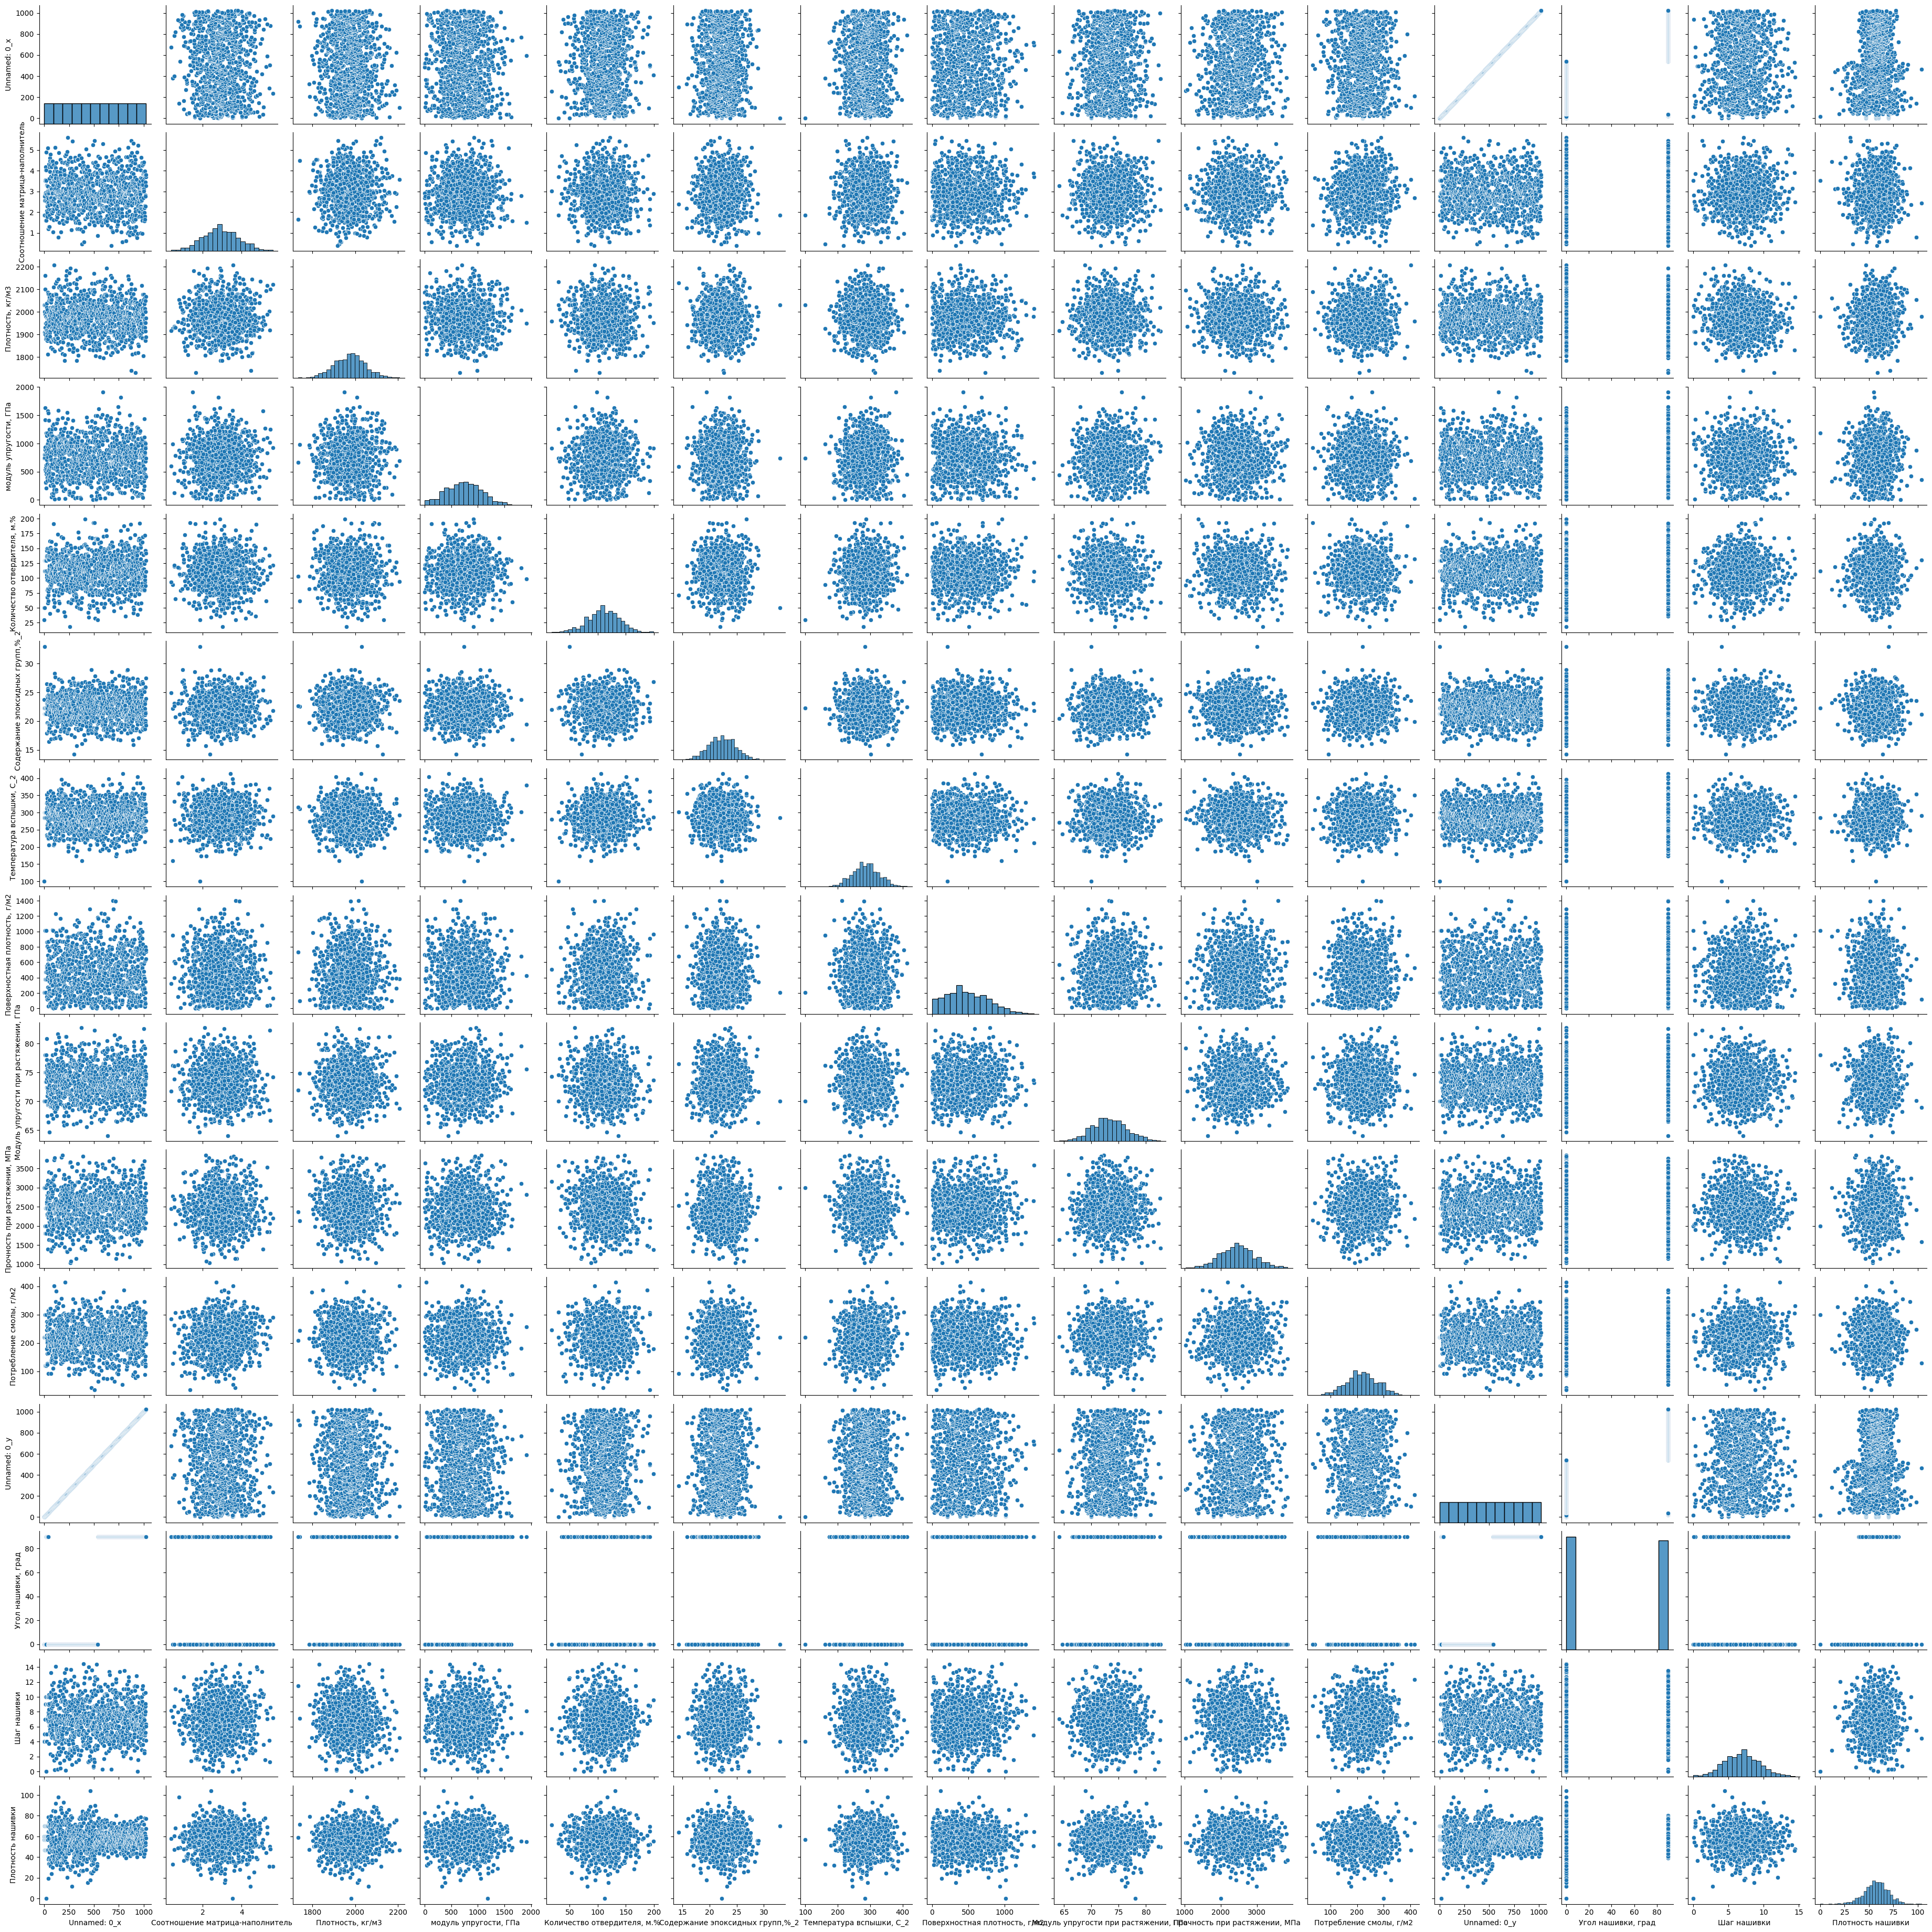

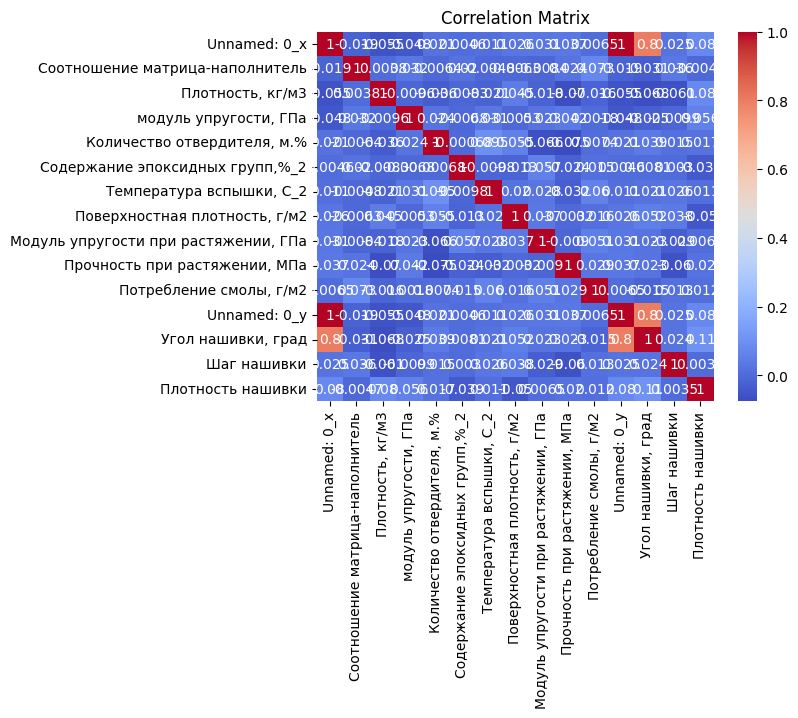

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка датасетов
df1 = pd.read_excel('/home/rw/myenv/VKR/X_bp.xlsx')
df2 = pd.read_excel('/home/rw/myenv/VKR/X_nup.xlsx')

# Объединение по индексу с типом INNER
merged_df = pd.merge(df1, df2, left_index=True, right_index=True, how='inner')

# Вывод объединенного датасета
print(merged_df)

# Проверка на пропуски и замена
if merged_df.isnull().values.any():
    # Если есть пропуски, можно исключить записи с пропусками
    # merged_df.dropna(inplace=True)

    # Или заменить пропуски на определенное значение, например, на среднее значение по столбцу
    merged_df.fillna(merged_df.mean(), inplace=True)

# Вывод датасета после обработки пропусков
print(merged_df)

# Построение графиков распределения
for column in merged_df.columns:
    plt.figure()
    merged_df[column].hist()
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Построение графиков попарного рассеивания
sns.pairplot(merged_df)
plt.show()

# Построение матрицы корреляции
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Выделение целевой переменной и признаков:
X = merged_df.drop(['Ваша целевая переменная'], axis=1)
y = merged_df['Ваша целевая переменная']

# Разделение данных на обучающий и тестовый наборы:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели, например, линейной регрессии:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Оценка модели на тестовом наборе:
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Сохранение модели для Flask с помощью библиотеки joblib:
import joblib
joblib.dump(model, 'model.pkl')
